## Final Project Submission

Please fill out:
* Student name: Elizabeth Masai
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Asha Deen and Lucille Kaleha
* Blog post URL:N/A



MICROSOFT FILM HAVEN

a)Business Overview

Microsoft wants to venture into the movie industry by setting up a new movie studio,with a primary goal of gaining vast knowledge and understanding of the current market so as to make sound decisions in film production.The project therefore explores the film production industry and analyses the information into actionable insight.

b)Business Understanding

Microsoft aims at establishing a new movie shop .The goal is to gain knowledge on the current market trends in the successful and well established movies at the box office to help in deciding on the types of movies to produce.The project also addresses key questions such as the genres that perform well at the box office and also if there are specific topics that resonate with the audience.

c)Data Understanding

This project makes use of data from a local file provided by Microsoft. The data includes the following datasets; 1.Movie genres 2.Movie budget 3.Movie gross output both foreign and domestic 4.movie review and  5.movie information

In [1]:
#Imported libraries to be used in this project includes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import os
import zipfile

In [2]:
# Extract IMDb SQL .db file
# with zipfile.ZipFile('./zippedData/im.db') as zipObj:
#     # Extract all contents of .zip file into current directory
#     zipObj.extractall(path=r"C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db.zip")
# # Create connection to IMDb DB
# con = sqlite3.connect('./zippedData/im.db')
# conn = sqlite3.connect(r"C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db.zip")



In [3]:
#importing and reading data from the  provided files
df = pd.read_csv(r'C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv.gz')# tmdb movies


In [4]:
df1 = pd.read_csv(r'C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv.gz')#movie gross
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
df2 = pd.read_csv(r'C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv.gz')#movie budget
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:

df3 = pd.read_csv(r'C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv.gz', delimiter='\t')#movie info
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
import pandas as pd

# encodings to try
encodings = ['utf-8', 'latin1', 'utf-16', 'utf-32', 'ISO-8859-1']

# Try reading the TSV file with different encodings
for encoding in encodings:
    try:
        df4 = pd.read_csv(r'C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\rt.reviews.tsv.gz', delimiter='\t', encoding=encoding)
        print("Successfully read the file with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read the file with encoding:", encoding)


print(df4)

Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1
         id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000    

In [8]:
import sqlite3

# # Specify the path to the SQLite database file
# db_file_path = "C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db"
# # Create a connection to the SQLite database
# conn = sqlite3.connect(db_file_path)
# #db_file_path = r"C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db"
# db_file_path = r"C:\Users\USER\Documents\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db"

# # Create a connection to the SQLite database
# conn = sqlite3.connect(db_file_path)

# conn = sqlite3.connect(db_file_path)
# df_IMDB = pd.read_sql("""
# SELECT *
#   FROM movie_basics;

# """,conn)
# print(df_IMDB)



In [9]:
# conn = sqlite3.connect(db_file_path)
# df_IMDB = pd.read_sql("""
# SELECT *
#   FROM movie_basics;

# """,conn)
# print(df_IMDB)

d).Data Preparation -This process involves data manipulation and conversion into a format that is better-suited for modeling.It entails, handling missing values, non-numeric data, and other transformations.


e)Data Cleaning -This process involves identifying and correcting errors ,inconsistencies in the datasets,to ensure that the data is suitable for analysis. It entails the following tasks; 1.Handling Duplicates 2.Handling missing values 3.Handling inacurate data 4.Dealing with outliers.

In [10]:
#Checking for null values
#tmdb movies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
print(df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [13]:
#Drop the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
#Checking for duplicates
df.shape


(26517, 9)

In [15]:
df.nunique(dropna=False)

genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [16]:
df.duplicated(subset='original_title').sum()

1682

In [17]:
df.duplicated(subset='title').sum()

1829

In [18]:
df.drop_duplicates(subset=['original_title','title' ],keep='last')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [20]:
# Check the data type of the release_date column
print(df['release_date'].dtype)

# If the release_date column is of type Timestamp, it contains dates
# You can directly format the dates to the desired format
df['release_date'] = df['release_date'].dt.strftime('%d %b %Y')

# Print the DataFrame to verify the changes
print(df)

object


AttributeError: Can only use .dt accessor with datetimelike values

In [21]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract month and create new column 'release_month' as integer
df['release_month'] = df['release_date'].dt.month

# Print the DataFrame to verify the changes
print(df)

                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3      

In [22]:
# Convert the 'release_date' column to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract month and create new column 'release_month' as integer
df['release_month'] = df['release_date'].dt.month

# Print the DataFrame to verify the changes
print(df)

                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3      

In [ ]:
# def parse_list_string(list_string):
#     # Remove brackets and split the string by comma
#     values = list_string.strip('[]').split(',')
#     # Convert individual elements to float (or int if applicable)
#     numeric_values = [float(value) for value in values]
#     return numeric_values

# # Apply the parsing function to the column containing string representations of lists
# df['release_date'] = df['release_date'].apply(parse_list_string)

# # Convert the parsed lists to float (or int if applicable)
# # Assuming each element in the list is a single value
# df['release_date'] = df['release_date'].apply(lambda x: [float(value) for value in x])

In [23]:
from datetime import datetime

# Define a function to convert the date format
def convert_date(date_str):
    # Convert the date to a datetime object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    # Format the datetime object to the desired format 
    formatted_date = date_obj.strftime('%d %b %Y')
    return formatted_date

df['release_date'] = df['release_date'].apply(lambda x: convert_date(x))

# Print the DataFrame to verify the changes
print(df)

TypeError: strptime() argument 1 must be str, not Timestamp

In [24]:
Define a function to convert the date format
def convert_date(date_str):
    # Convert the date to a datetime object
    date_obj = datetime.strptime(date_str, '%b %d, %Y')
    # Format the datetime object to the desired format '29 Dec 2023'
    formatted_date = date_obj.strftime('%d %b %Y')
    return formatted_date

# Apply the conversion function to the 'release_date' column
df2['release_date'] = df2['release_date'].apply(lambda x: convert_date(x))

# Print the DataFrame to verify the changes
print(df2)

SyntaxError: invalid syntax (2145828581.py, line 1)

In [25]:
# Remove the $ sign from the movie budget DataFrame(df2) so as to compare and join it with the gross dataframe
df2['production_budget'] = df2['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Display the DataFrame to verify the changes
print(df2.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


In [26]:
df2.loc['0':,	]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [27]:
# Check if any item in 'title' column of df is found in 'movie' column of df2
matching_titles = df['title'].isin(df2['movie'])

# Check if any matching title is found
if matching_titles.any():
    print("There are matching titles between 'title' column of df and 'movie' column of df2")
else:
    print("No matching titles found between 'title' column of df and 'movie' column of df2")


There are matching titles between 'title' column of df and 'movie' column of df2


In [28]:
merged_DataFrame = pd.merge(df, df2, on='release_date', how='outer')

# Display the merged DataFrame
print(merged_DataFrame)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [29]:
merged_DataFrame
merged_DataFrame.rename(columns={'movie': 'movie title'}, inplace=True)

# Print the DataFrame to verify the changes
print(merged_DataFrame)

NameError: name 'merged_DataFrame' is not defined

In [30]:
# Create a new column 'same_title' to store the comparison result
merged_DataFrame['same_title'] = merged_DataFrame['movie title'] == merged_DataFrame['title']

# Display the DataFrame with the comparison result
print(merged_DataFrame[['movie title', 'title', 'same_title']])

NameError: name 'merged_DataFrame' is not defined

In [31]:
# Locate the row where the title is 'Harry Potter and the Deathly Hallows: Part I' and update it
merged_DataFrame.loc[merged_DataFrame['movie title'] == 'Harry Potter and the Deathly Hallows: Part I', 'movie title'] = 'Harry Potter and the Deathly Hallows: Part 1'

# Display the DataFrame to verify the changes
print(merged_DataFrame)

NameError: name 'merged_DataFrame' is not defined

In [32]:
print(merged_DataFrame.columns)

NameError: name 'merged_DataFrame' is not defined

In [33]:
merged_DataFrame = merged_DataFrame[['original_title', 'release_date', 'popularity', 'title', 'vote_average', 'vote_count', 
         'production_budget', 'domestic_gross', 'worldwide_gross']]

# Renaming columns for clarity
merged_DataFrame.columns = ['Original Title', 'Release Date', 'Popularity', 'Title', 'Vote Average', 'Vote Count', 
              'Production Budget', 'Domestic Gross', 'Worldwide Gross']

# Sorting the DataFrame by release date
merged_DataFrame.sort_values(by='Release Date') #inplace=True)

# Resetting the index
merged_DataFrame.reset_index(drop=True) #inplace=True)

# Displaying the formatted DataFrame
print(merged_DataFrame.columns)

NameError: name 'merged_DataFrame' is not defined

In [34]:
#Replace non-numeric values with NaN
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

# Display the DataFrame to verify the changes
print(df1)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

In [35]:
#Converting  foreign gross values in movie gross to a float
df1['foreign_gross'] = df1['foreign_gross'].astype(float)

# Display the DataFrame to verify the changes
print(df1)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

In [37]:
df1.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [36]:
# Drop the 'foreign_gross' column from the movie gross DataFrame (df1)
df1.drop('foreign_gross', axis=1) #inplace=True

# Add the 'foreign_gross' column to the movie budget DataFrame (df2)
df2['foreign_gross'] = df1['foreign_gross']

# Display the updated DataFrame (df2) to verify the changes
print(df2)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  foreign_gross  
0           425000000.0     760507625.0     2.776345e+09    652000000.0  

In [38]:
## Convert 'release_date' column to datetime format 
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract month and create new column 'release_month' with month names
df['release_month'] = df['release_date'].dt.strftime('%b')

# Print the DataFrame to verify the changes
print(df)

                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3      

In [39]:
## Convert 'release_date' column to datetime format 
df2['release_date'] = pd.to_datetime(df2['release_date'])

# Extract month and create new column 'release_month' with month names
df2['release_month'] = df2['release_date'].dt.strftime('%b')

# Print the DataFrame to verify the changes
print(df2)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  foreign_gross  \
0           425000000.0     760507625.0     2.776345e+09    652000000.0   
1        

In [40]:
df2.loc[0:,]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,664300000.0,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,535700000.0,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,513900000.0,Dec
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,NaN,Dec
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,Apr
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,Jul
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep


In [41]:
#Remove null values

In [42]:
# Sort the DataFrame by 'domestic_gross' in descending order
df2_sorted = df2.sort_values(by='domestic_gross', ascending=False)

# Print the sorted DataFrame
print(df2_sorted)

      id release_date                                       movie  \
5      6   2015-12-18        Star Wars Ep. VII: The Force Awakens   
0      1   2009-12-18                                      Avatar   
41    42   2018-02-16                               Black Panther   
6      7   2018-04-27                      Avengers: Infinity War   
42    43   1997-12-19                                     Titanic   
...   ..          ...                                         ...   
2709  10   2004-03-31                                   The Touch   
2708   9   2010-04-13  Three Kingdoms: Resurrection of the Dragon   
2707   8   2012-12-31                                    Zambezia   
2706   7   2008-12-31                                     Admiral   
5317  18   2014-06-24                                 A Fine Step   

      production_budget  domestic_gross  worldwide_gross  foreign_gross  \
5           306000000.0     936662225.0     2.053311e+09    398000000.0   
0           425000000

In [43]:
merged_df = pd.merge(df2, df[['release_date', 'title']], on='release_date', how='left')

# Display the merged DataFrame
print(merged_df)

       id release_date                                        movie  \
0       1   2009-12-18                                       Avatar   
1       2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2       2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
3       2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
4       2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
...    ..          ...                                          ...   
40951  81   2015-09-29                         A Plague So Pleasant   
40952  81   2015-09-29                         A Plague So Pleasant   
40953  81   2015-09-29                         A Plague So Pleasant   
40954  81   2015-09-29                         A Plague So Pleasant   
40955  82   2005-08-05                            My Date With Drew   

       production_budget  domestic_gross  worldwide_gross  foreign_gross  \
0            425000000.0     760507625.0     2.776345e+09    652000000.

In [44]:
merged_df.loc[0: ,]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec,Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Pirates of the Caribbean: On Stranger Tides
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Midnight in Paris
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,12 Paces without a Head
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,The Passing
...,...,...,...,...,...,...,...,...,...
40951,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,My Brother's Bomber
40952,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,Death's Door
40953,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,Rows
40954,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,Everything Is Copy


In [45]:
merged_df.drop_duplicates(subset='movie',inplace=True)
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec,Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Pirates of the Caribbean: On Stranger Tides
13,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,664300000.0,Jun,NaN
14,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,535700000.0,May,Avengers: Age of Ultron
38,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,513900000.0,Dec,Star Wars: The Last Jedi
...,...,...,...,...,...,...,...,...,...
40925,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,NaN,Dec,Doraemon the Movie: Nobita's Treasure Island
40935,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,Apr,NaN
40936,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,Jul,NaN
40937,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,"Signed, Sealed, Delivered"


In [46]:
#Remove rows with null values
merged_df.dropna(subset=['domestic_gross'],inplace=True)
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec,Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Pirates of the Caribbean: On Stranger Tides
13,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,664300000.0,Jun,NaN
14,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,535700000.0,May,Avengers: Age of Ultron
38,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,513900000.0,Dec,Star Wars: The Last Jedi
...,...,...,...,...,...,...,...,...,...
40925,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,NaN,Dec,Doraemon the Movie: Nobita's Treasure Island
40935,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,Apr,NaN
40936,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,Jul,NaN
40937,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,Sep,"Signed, Sealed, Delivered"


In [47]:
#Remove rows with value=0
merged_df =merged_df[merged_df['domestic_gross'] != 0]
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec,Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Pirates of the Caribbean: On Stranger Tides
13,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,664300000.0,Jun,NaN
14,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,535700000.0,May,Avengers: Age of Ultron
38,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,513900000.0,Dec,Star Wars: The Last Jedi
...,...,...,...,...,...,...,...,...,...
40923,76,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04,NaN,May,NaN
40924,77,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02,NaN,Dec,NaN
40935,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,Apr,NaN
40936,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,Jul,NaN


In [48]:
#remove duplicate values
merged_df.drop_duplicates(subset='domestic_gross' ,inplace=True)
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,652000000.0,Dec,Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,691300000.0,May,Pirates of the Caribbean: On Stranger Tides
13,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,664300000.0,Jun,NaN
14,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,535700000.0,May,Avengers: Age of Ultron
38,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,513900000.0,Dec,Star Wars: The Last Jedi
...,...,...,...,...,...,...,...,...,...
40923,76,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04,NaN,May,NaN
40924,77,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02,NaN,Dec,NaN
40935,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,Apr,NaN
40936,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,Jul,NaN


In [54]:
top_ten_movies = merged_df.sort_values(by=['domestic_gross', 'movie'], ascending=[False, False])

# Display the first 10 values
print(top_ten_movies[['domestic_gross', 'movie']].head(10))

     domestic_gross                                 movie
54      936662225.0  Star Wars Ep. VII: The Force Awakens
0       760507625.0                                Avatar
433     700059566.0                         Black Panther
67      678815482.0                Avengers: Infinity War
455     659363944.0                               Titanic
364     652270625.0                        Jurassic World
304     623279547.0                          The Avengers
38      620181382.0     Star Wars Ep. VIII: The Last Jedi
456     608581744.0                         Incredibles 2
878     533720947.0                       The Dark Knight


Data Visualization is one of the Exploratory Data Analysis activies that help in data analysis.

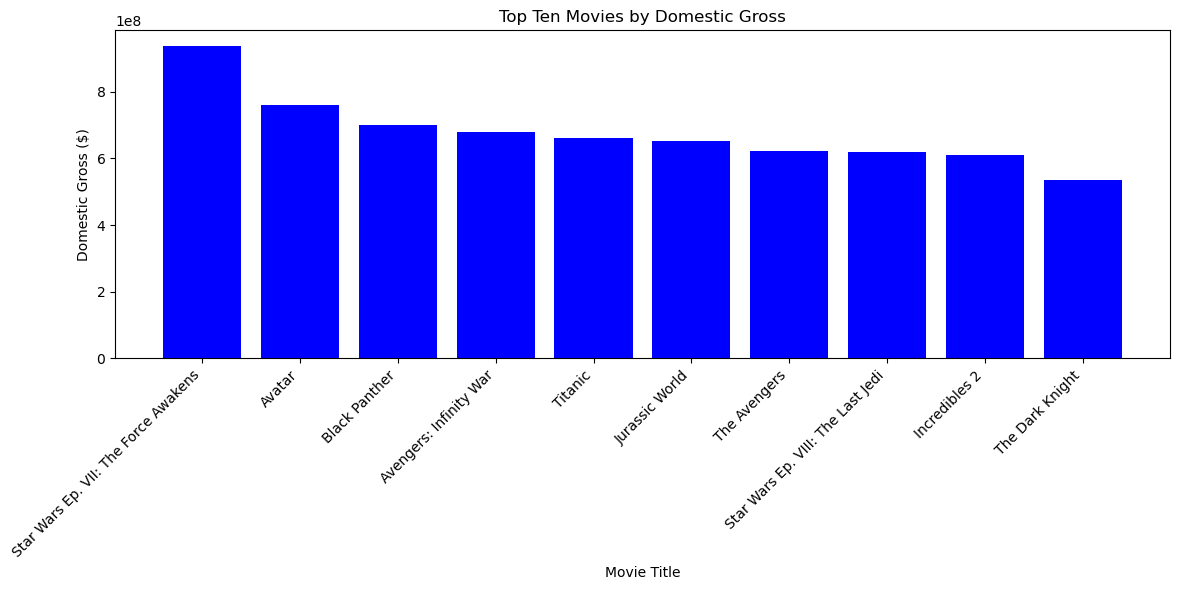

In [79]:
# Visualizing the top_ten_movies

import matplotlib.pyplot as plt

# Data
domestic_gross = [
    936662225.0,
    760507625.0,
    700059566.0,
    678815482.0,
    659363944.0,
    652270625.0,
    623279547.0,
    620181382.0,
    608581744.0,
    533720947.0
]

movie_titles = [
    "Star Wars Ep. VII: The Force Awakens",
    "Avatar",
    "Black Panther",
    "Avengers: Infinity War",
    "Titanic",
    "Jurassic World",
    "The Avengers",
    "Star Wars Ep. VIII: The Last Jedi",
    "Incredibles 2",
    "The Dark Knight"
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(movie_titles, domestic_gross, color='blue')
plt.title('Top Ten Movies by Domestic Gross')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above bar graph,Star Wars Ep. VII: The Force Awakens has the highest domestic gross while The Dark Knight has the lowest Domestic Gross value in the list of top ten movies.